# Inversion Demo

Work in progress...

In [1]:
from music21 import *

In [2]:
# ignore this
%load_ext music21.ipython21.ipExtension

In [5]:
import copy

In [6]:
it = ['M-3','P1','A4']

In [7]:
p = pitch.Pitch('F4')
cList = []

In [8]:
for int in it:
    pNew = p.transpose(int, inPlace=False)
    cList.append(pNew)

In [9]:
cList

[<music21.pitch.Pitch D-4>, <music21.pitch.Pitch F4>, <music21.pitch.Pitch B4>]

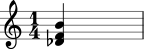

In [10]:
chord1 = chord.Chord(cList)
chord1.show()

In [11]:
chord1.inversion(0)

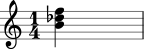

In [12]:
chord1.show()

In [13]:
max(chord1.pitches)

<music21.pitch.Pitch F5>

In [14]:
cMaj = chord.Chord("C3 E3 G3")
s = stream.Stream()
for i in range(20):
    inv = i % 3
    s.append(cMaj)
    cMajCopy = copy.deepcopy(cMaj)
    cMajCopy.inversion(inv)
    cMaj = cMajCopy


In [15]:
s.show('text')

{0.0} <music21.chord.Chord C3 E3 G3>
{1.0} <music21.chord.Chord C3 E3 G3>
{2.0} <music21.chord.Chord E3 G3 C4>
{3.0} <music21.chord.Chord G3 C4 E4>
{4.0} <music21.chord.Chord C4 E4 G4>
{5.0} <music21.chord.Chord E4 G4 C5>
{6.0} <music21.chord.Chord G4 C5 E5>
{7.0} <music21.chord.Chord C5 E5 G5>
{8.0} <music21.chord.Chord E5 G5 C6>
{9.0} <music21.chord.Chord G5 C6 E6>
{10.0} <music21.chord.Chord C6 E6 G6>
{11.0} <music21.chord.Chord E6 G6 C7>
{12.0} <music21.chord.Chord G6 C7 E7>
{13.0} <music21.chord.Chord C7 E7 G7>
{14.0} <music21.chord.Chord E7 G7 C8>
{15.0} <music21.chord.Chord G7 C8 E8>
{16.0} <music21.chord.Chord C8 E8 G8>
{17.0} <music21.chord.Chord E8 G8 C9>
{18.0} <music21.chord.Chord G8 C9 E9>
{19.0} <music21.chord.Chord C9 E9 G9>


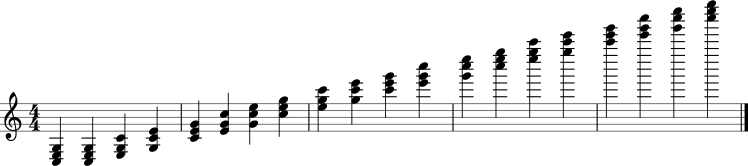

In [16]:
s.show()

In [17]:
cMaj = chord.Chord("C1 G1 E2")
s = stream.Stream()
for i in range(7):
    inv = i % 3
    s.append(cMaj)
    cMajCopy = copy.deepcopy(cMaj)
    cMajCopy.inversion(inv)
    cMaj = cMajCopy

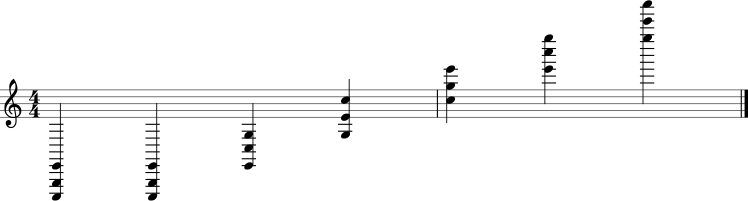

In [18]:
s.show()

In [19]:
cMaj = chord.Chord("C3 E3 G3 B-3 D-4 F#4")
s = stream.Stream()
for i in range(17):
    inv = i % 6
    s.append(cMaj)
    cMajCopy = copy.deepcopy(cMaj)
    cMajCopy.inversion(inv)
    cMaj = cMajCopy

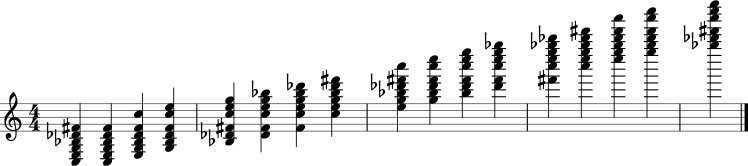

In [20]:
s.show()

In [21]:
s.show('midi')

In [22]:
germ6 = chord.Chord("A-3 C4 E-4 F#4")
s = stream.Stream()
print(germ6.inversion())
for i in range(12):
    inv = i % 3
    s.append(germ6)
    germ6Copy = copy.deepcopy(germ6)
    germ6Copy.inversion(inv)
    germ6 = germ6Copy

1


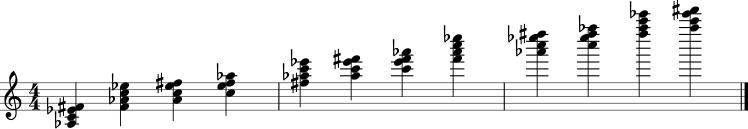

In [23]:
s.show()

All subchords.

In [24]:
from itertools import combinations as comb

In [28]:
c = chord.Chord([0, 1, 2, 4, 7, 8])
c.commonName

'all tri-chord hexachord'

In [3]:
cc = set()
for i in comb(c.pitches, 3):
    cc.add(chord.Chord(i).forteClassNumber)
cc

NameError: name 'comb' is not defined

In [33]:
s = stream.Part()
for i in [8,6,7,5,3,0,9,  8,6,7,5,3,0,9]:
    n = note.Note(i)
    if i == 3:
        n.quarterLength = .5
    elif i == 9:
        n.quarterLength = 2.5
    n.quarterLength *= .5
    s.append(n)
s.show('midi')

In [28]:
t = stream.Part()
for i in [8,6,7,5,3,0,9]:
    n = note.Note()
    n.pitch.diatonicNoteNum = 27 + i
    t.append(n)
t.show('midi')

In [30]:
sc = stream.Score()
sc.insert(0, s.makeMeasures())
sc.insert(0, t.makeMeasures())
sc.show('midi')

In [4]:
n = note.Note(54)
n.show('musicxml.png', dpi=300)

In [13]:
allI = 0
allM3 = 0
for c in corpus.chorales.Iterator():
    for p in c.parts:
        lastN = None
        for n in p.recurse().getElementsByClass('Note'):
            if lastN is not None:
                allI += 1
                if abs(n.pitch.ps - lastN.pitch.ps) == 4:
                    allM3 += 1
            lastN = n

In [14]:
allI, allM3, allM3/allI

(101088, 3770, 0.03729423868312757)